In [247]:
# univariate cnn lstm example
import numpy as np
import pandas as pd
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.layers import Conv1D
from tensorflow.layers import MaxPooling1D
import matplotlib
import matplotlib.pyplot as plt

In [1]:
# Dividimos la seuencia en muestras
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Encontrar el fin del patron
        end_ix = i + n_steps
        # Verificar si estamos fuera de la secuencia
        if end_ix > len(sequence)-1:
            break
        # Reunimo las partes correspondientes a inputs y outputs del patron
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [249]:
# Dada una secuencia de Entrada
data= pd.read_csv('EURUSD1.csv', 
                  sep=',', 
                  names=["time", "Open", "Max", "Min", "Close", "Volumen"])

In [250]:
raw_seq= pd.Series((data['Max'] - data['Max'].mean())/ (data['Max'].max() - data['Max'].min())).values
raw_seq=raw_seq

In [251]:
# Numero de steps
n_steps = 4
# Separamos en muestras
X_raw, y_raw = split_sequence(raw_seq, n_steps)
X_train=X_raw[0:-50]
y_train=y_raw[0:-50]
X_test=X_raw[-50:]
y_test=y_raw[-50:]
# visualizar
#for i in range(len(X)):
#    print(X[i], y[i])

In [260]:
# reshape desde [samples, timesteps] a [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X_train = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_seq, n_steps, n_features))

In [19]:
#Definimos el modelo
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu',strides=1), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Use tf.cast instead.


In [20]:
# fit model
model.fit(X_train, y_train, epochs=500, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [259]:
# demonstrate prediction
y_teout = model.predict(X_test, verbose=0)
y_trout = model.predict(X_train, verbose=0)

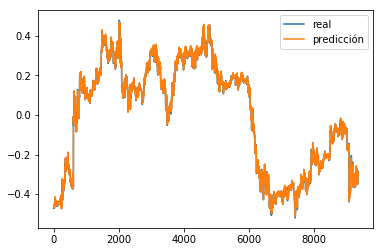

In [24]:
fig, ax = plt.subplots()
ax.plot(y_train, label='real')
ax.plot(y_trout,label='predicción')
ax.legend()
plt.show()

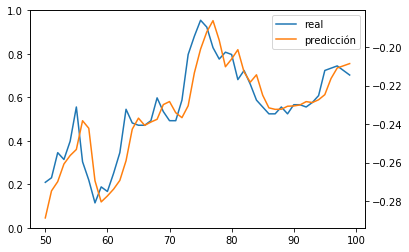

In [30]:
fig, ax = plt.subplots()
ax = ax.twinx()
#ax.plot(y_raw[-100:], label='train')
ax.plot(np.arange(50)+50,y_test, label='real')
ax.plot(np.arange(50)+50,y_teout,label='predicción')
ax.legend()
plt.show()

In [94]:
N=[]
vp2=[]
for t in range (0,np.shape(y_teout)[0]-1):
    if (np.sign([y_test[t+1]-y_test[t]])*np.sign([y_teout[t+1]-y_test[t]]))>0:
        vp2.append(1)
        N.append(1)
    else:
        N.append(1)
MDA=1/sum(N)*sum(vp2)

In [96]:
MDA

0.4693877551020408

In [162]:
X_train[-1]

array([[[-0.28686493],
        [-0.28567869]],

       [[-0.29754109],
        [-0.29872733]]])

In [170]:
X_pls=X_train[-1]
X_pls

array([[[-0.28567869],
        [-0.28567869]],

       [[-0.29754109],
        [-0.29872733]]])

In [270]:
X_pls=X_train[-2:].copy()
X_pls

array([[[[-0.28567869],
         [-0.28686493]],

        [[-0.28567869],
         [-0.29754109]]],


       [[[-0.28686493],
         [-0.28567869]],

        [[-0.29754109],
         [-0.29872733]]]])

In [220]:
for i in range(0,2):
    for t in range(0,1):
        print(t)
        X_pls[i][t][0]=X_pls[i][t][0]
X_pls

0
0


array([[[-0.31177597],
        [-0.31177597]],

       [[-0.30109981],
        [-0.30109981]]])

In [238]:
X_pls[0][0][0]=X_pls[0][1][0]
X_pls[0][1][0]=X_pls[1][0][0]
X_pls[1][0][0]=X_pls[1][1][0]


In [244]:
X_pls[1][1][0]=X_pls[1][1][0]

In [263]:
a= model.predict(X_train[0], verbose=0)

ValueError: Error when checking input: expected time_distributed_7_input to have 4 dimensions, but got array with shape (2, 2, 1)

In [256]:
X_train[-1]

array([[[-0.28686493],
        [-0.28567869]],

       [[-0.29754109],
        [-0.29872733]]])

In [257]:
X_train

array([[[[-0.47073208],
         [-0.47191831]],

        [[-0.47310455],
         [-0.47073208]]],


       [[[-0.47191831],
         [-0.47310455]],

        [[-0.47073208],
         [-0.46954584]]],


       [[[-0.47310455],
         [-0.47073208]],

        [[-0.46954584],
         [-0.46717336]]],


       ...,


       [[[-0.30109981],
         [-0.28567869]],

        [[-0.28686493],
         [-0.28567869]]],


       [[[-0.28567869],
         [-0.28686493]],

        [[-0.28567869],
         [-0.29754109]]],


       [[[-0.28686493],
         [-0.28567869]],

        [[-0.29754109],
         [-0.29872733]]]])

In [266]:
y_teout = model.predict(X_test[:2], verbose=0)

In [267]:
y_teout

array([[-0.28874755],
       [-0.27470174]], dtype=float32)

In [268]:
X_test[:2]

array([[[[-0.28567869],
         [-0.29754109]],

        [[-0.29872733],
         [-0.28330622]]],


       [[[-0.29754109],
         [-0.29872733]],

        [[-0.28330622],
         [-0.27025758]]]])